# Capsule Net

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
input_image = tf.placeholder(shape = [None,290,290,3], dtype = float32)
conv1 = tf.layers.conv2D(input_image, 10, kernel_size = 9, stride=1,padding=“)
conv1 = tf.layer.conv2D(activation= ‘relu’)
conv2 = tf.layers.conv2D(input_image, 256, kernel_size = 9, stride=2,padding=“none”)
conv2 = tf.layer.conv2D(activation= ‘relu’)
capsule_1= tf.reshape(conv2,[-1,1152,8]) 

In [ ]:
def squash(s, name=None): 
with tf.name_scope(name, default_name="squash"): 
squared_norm = tf.reduce_sum(tf.square(s), axis=-1,     keep_dims=True)
safe_norm = tf.sqrt(squared_norm + 1e-7)
squash_factor = squared_norm / (1. + squared_norm) unit_vector = s / safe_norm return squash_factor * unit_vector
caps1_out = squash(capsule_1)

In [ ]:
W_init = tf.random_normal(shape=(1, caps1_n_caps, caps2_n_caps, caps2_n_dims, caps1_n_dims), stddev=init_sigma, dtype=tf.float32, name="W_init") W = tf.Variable(W_init, name="W")

batch_size = tf.shape(X)[0] W_tiled = tf.tile(W, [batch_size, 1, 1, 1, 1], name="W_tiled")

In [ ]:
caps1_output_enlarge = tf.expand_dims(caps1_output, -1)
caps1_output_tile = tf.expand_dims(caps1_output_expanded)
caps1_output_tiled = tf.tile(caps1_output_tile, [1, 1, caps2_n_caps, 1, 1])

print(W_tiled)
print(caps1_output_tiled)

In [ ]:
caps2_predicted = tf.matmul(W_tiled, caps1_output_tiled)
print(caps2_predicted)

In [ ]:
raw_weights = tf.zeros([batch_size, caps1_n_caps, caps2_n_caps, 1, 1], dtype=np.float32, name="raw_weights")

routing_weights = tf.nn.softmax(raw_weights, dim=2, name="routing_weights")

weighted_predictions = tf.multiply(routing_weights, caps2_predicted, name="weighted_predictions") weighted_sum = tf.reduce_sum(weighted_predictions, axis=1, keep_dims=True, name="weighted_sum")


Round 2 Routing: 


caps2_output_round_1_tiled = tf.tile( caps2_output_round_1, [1, caps1_n_caps, 1, 1, 1], name="caps2_output_round_1_tiled")

agreement = tf.matmul(caps2_predicted, caps2_output_round_1_tiled, transpose_a=True, name="agreement")

raw_weights_round_2 = tf.add(raw_weights, agreement, name="raw_weights_round_2")

routing_weights_round_2 = tf.nn.softmax(raw_weights_round_2, dim=2, name="routing_weights_round_2")

weighted_predictions_round_2 = tf.multiply(routing_weights_round_2, caps2_predicted, name="weighted_predictions_round_2") 

weighted_sum_round_2 = tf.reduce_sum(weighted_predictions_round_2, axis=1, keep_dims=True, name="weighted_sum_round_2") 

caps2_output_round_2 = squash(weighted_sum_round_2, axis=-2, name="caps2_output_round_2")


 y = tf.placeholder(shape=[None], dtype=tf.int64, name="y")

In [ ]:
m_plus = 0.9
m_minus = 0.1
lambda_ = 0.5 

T = tf.one_hot(y, depth=caps2_n_caps, name="T")

caps2_output_norm = safe_norm(caps2_output, axis=-2, keep_dims=True, name="caps2_output_norm")

present_error_raw = tf.square(tf.maximum(0., m_plus - caps2_output_norm), name="present_error_raw")

present_error = tf.reshape(present_error_raw, shape=(-1, 10), name="present_error")

absent_error_raw = tf.square(tf.maximum(0., caps2_output_norm - m_minus), name="absent_error_raw")

absent_error = tf.reshape(absent_error_raw, shape=(-1, 10), name="absent_error")

L = tf.add(T * present_error, lambda_ * (1.0 - T) * absent_error, name="L")

margin_loss = tf.reduce_mean(tf.reduce_sum(L, axis=1), name="margin_loss")

In [ ]:
mask_with_labels=tf.placeholder_with_default(False,shape=(),name="mask_with_labels")
reconstruction_targets = tf.cond(mask_with_labels, lambda: y, lambda: y_pred) 

Reconstruction_mask=tf.one_hot(reconstruction_targets,depth=caps2_n_caps,name="reconstruction_mask")

reconstruction_mask_reshaped=tf.reshape(reconstruction_mask,[-1,1,caps2_n_caps, 1, 1], name="reconstruction_mask_reshaped")

caps2_output_masked=tf.multiply(caps2_output,reconstruction_mask_reshaped,name="caps2_output_masked")

decoder_input=tf.reshape(caps2_output_masked,[-1,caps2_n_caps*caps2_n_dims], name="decoder_input")


With tf.name_scope("decoder"): 

hidden1=tf.layers.dense(decoder_input,512,activation=’relu’,name="hidden1")
          hidden2 = tf.layers.dense(hidden1,1024, activation=’relu’, name="hidden2") 
decoder_output=tf.layers.dense(hidden2,28X28,activation=’sigmoid’,name="decoder_output")


X_flat = tf.reshape(X, [-1, n_output], name="X_flat")

squared_difference=tf.square(X_flat-decoder_output,name="squared_difference") reconstruction_loss=tf.reduce_mean(squared_difference,name="reconstruction_loss")

loss = tf.add(margin_loss, 0.001 * reconstruction_loss, name="loss")

In [ ]:
n_epochs = 10
batch_size = 32
with tf.Session() as sess:
    if restore_checkpoint and tf.train.checkpoint_exists(checkpoint_path):
        saver.restore(sess, checkpoint_path)
    else:
        init.run()
    loss_vals = []
        acc_vals = []
        for iteration in range(1, n_iterations_validation + 1):
            X_batch, y_batch = mnist.validation.next_batch(batch_size)
            loss_val, acc_val = sess.run(
                    [loss, accuracy],
                    feed_dict={X: X_batch.reshape([-1, 28, 28, 1]),
                               y: y_batch})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
            print("\rEvaluating the model: {}/{} ({:.1f}%)".format(
                      iteration, n_iterations_validation,
                      iteration * 100 / n_iterations_validation),
                  end=" " * 10)
        loss_val = np.mean(loss_vals)
        acc_val = np.mean(acc_vals)
        print("\rEpoch: {}  Val accuracy: {:.4f}%  Loss: {:.6f}{}".format(
            epoch + 1, acc_val * 100, loss_val)

In [ ]:
n_iterations_test = mnist.test.num_examples
loss_tests = []
acc_tests = []
for iteration in range(1, n_iterations_test + 1):
        X_batch, y_batch = mnist.test.next_batch(batch_size)
        loss_test, acc_test = sess.run(
                [loss, accuracy],
                feed_dict={X: X_batch.reshape([-1, 28, 28, 1]),
                           y: y_batch})
        loss_tests.append(loss_test)
        acc_tests.append(acc_test)
        print("\rEvaluating the model: {}/{} ({:.1f}%)".format(
                  iteration, n_iterations_test,
                  iteration * 100 / n_iterations_test),
              end=" " * 10)
    loss_test = np.mean(loss_tests)
    acc_test = np.mean(acc_tests)
    print("\rFinal test accuracy: {:.4f}%  Loss: {:.6f}".format(
        acc_test * 100, loss_test))

In [ ]:
sample_images = sample_images.reshape(-1, 28, 28)
reconstructions = decoder_output_value.reshape([-1, 28, 28])

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    plt.imshow(sample_images[index], cmap="binary")
    plt.title("Label:" + str(mnist.test.labels[index]))
    plt.axis("off")
plt.show()

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    plt.title("Predicted:" + str(y_pred_value[index]))
    plt.imshow(reconstructions[index], cmap="binary")
    plt.axis("off")
plt.show()

# 

# CNN

# 

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sys
from numpy import load
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.models import Model
from tensorflow.keras import regularizers
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.mobilenet_v2 import preprocess_input, MobileNetV2

In [23]:
df=pd.read_csv("/90days/s4634945/files/UntitledFolder/CNN_dataframe_gene_expression_3.csv")
df_test=pd.read_csv("/90days/s4634945/files/UntitledFolder/CNN_dataframe_gene_expression_test_3.csv")
df['Cluster'] = df['Cluster'].astype('str')
df_test['Cluster']= df_test['Cluster'].astype('str')
datagen=ImageDataGenerator(rescale=1./255,validation_split = 0.2, featurewise_center=True,
            featurewise_std_normalization=True,
            rotation_range=0)
            #width_shift_range=0.2,
            #height_shift_range=0.2,
            #horizontal_flip=True,
            #vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255,featurewise_center=True)
train_generator=datagen.flow_from_dataframe(dataframe=df, directory="/90days/s4634945/files/UntitledFolder/Sharpened_1A", x_col="Image", y_col="Cluster", class_mode="categorical", target_size=(290,290), batch_size=16, subset="training")
valid_generator = datagen.flow_from_dataframe(dataframe=df, directory="/90days/s4634945/files/UntitledFolder/Sharpened_1A", x_col="Image", y_col="Cluster", class_mode="categorical", target_size=(290,290), batch_size=16, subset="validation")
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test, directory="/90days/s4634945/files/UntitledFolder/Trainimg_breast_test_299", x_col="Image", y_col="Cluster", class_mode="categorical", target_size=(290,290), batch_size=32)

Found 3039 validated image filenames belonging to 3 classes.
Found 759 validated image filenames belonging to 3 classes.
Found 3987 validated image filenames belonging to 3 classes.


In [24]:
'''
model = Sequential([
    
    # First convolution
        Conv2D(16, (3,3), activation='relu', input_shape=(290,290, 3), kernel_regularizer=regularizers.l2(0.02)),
        #Conv2D(16, (3,3), activation='relu'),
        MaxPooling2D(2, 2),
    
    # Second convolution
        Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02)),
        #Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),
    
    # Third convolution
        Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02)),
        #Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
       

    
    # Fourth convolution
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),
    
        Flatten(),
    
    # Dense hidden layer
        Dense(128, activation='relu'),
        Dropout(0.5),
 
    # Output neuron. 
        Dense(3, activation='softmax')])

'''

model = MobileNetV2(include_top=False, input_shape=(290,290,3), weights = "imagenet")
        
flat1 = Flatten()(model.layers[-1].output)

output = Dense(3, activation='softmax')(flat1)
model = Model(inputs=model.inputs, outputs=output)
opt = Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(train_generator,validation_data=valid_generator,epochs=5)

9412608/9406464 [==============================] - 1s 0us/step


/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
190/190 [==============================] - 213s 1s/step - loss: 1.6820 - accuracy: 0.3519 - val_loss: 1.4990 - val_accuracy: 0.4493
Epoch 2/5
190/190 [==============================] - 206s 1s/step - loss: 1.1292 - accuracy: 0.5046 - val_loss: 1.4693 - val_accuracy: 0.3966
Epoch 3/5
190/190 [==============================] - 226s 1s/step - loss: 0.8625 - accuracy: 0.6287 - val_loss: 1.5254 - val_accuracy: 0.4335
Epoch 4/5
190/190 [==============================] - 216s 1s/step - loss: 0.6423 - accuracy: 0.7329 - val_loss: 1.5388 - val_accuracy: 0.3913
Epoch 5/5
190/190 [==============================] - 208s 1s/step - loss: 0.4840 - accuracy: 0.8144 - val_loss: 1.6150 - val_accuracy: 0.3360


In [ ]:
import matplotlib.pyplot as plt
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    plt.show()
    
plot_training(history)

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 288, 288, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 144, 144, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 142, 142, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 71, 71, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 71, 71, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 69, 69, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 34, 34, 64)       

In [1]:
import h5py
from keras.models import load_model 
#model.save('Scratch_model_1')
model = load_model("Scratch_model_1") 
#print(loaded_model.evaluate(test_generator))

/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


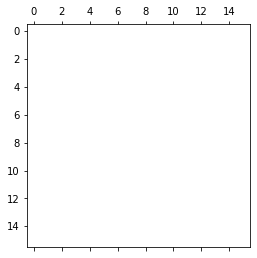

In [9]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

model = model 

img = image.load_img('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/1000img.tif', target_size=(290,290))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#print(decode_predictions(predicted_vals[0,:]))
with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('max_pooling2d_7')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((16,16))
plt.matshow(heatmap)
plt.show()

In [10]:
from keras.preprocessing import image
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(290, 290))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        #x = inet_model.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


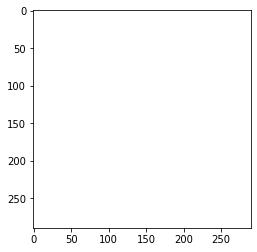

In [11]:
import os
from keras.applications.imagenet_utils import decode_predictions
images = transform_img_fn([os.path.join('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299','0032img.tif')])
plt.imshow(images[0])
preds = model.predict(images)

In [12]:
%%time
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=3)

  0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 1.85 s, sys: 189 ms, total: 2.04 s
Wall time: 8.02 s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


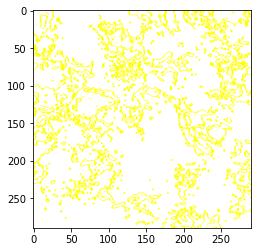

In [13]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=100, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

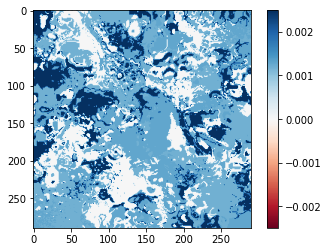

In [14]:
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


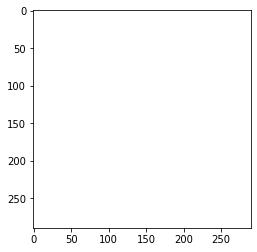

In [27]:
import os
from keras.applications.imagenet_utils import decode_predictions
images = transform_img_fn([os.path.join('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299','1000img.tif')])
plt.imshow(images[0])
preds = model.predict(images)

In [34]:
%%time
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 1.61 s, sys: 906 µs, total: 1.61 s
Wall time: 1.53 s


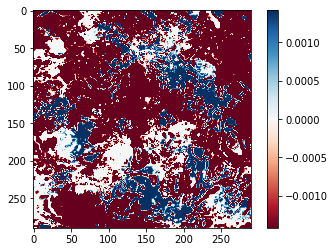

In [45]:
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [ ]:
import os
from keras.applications.imagenet_utils import decode_predictions
images = transform_img_fn([os.path.join('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299','0055img.tif')])
plt.imshow(images[0])
preds = model.predict(images)

In [ ]:
%%time
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=3)

In [ ]:
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [77]:
plt.imsave('/90days/s4634945/files/UntitledFolder/LIME/Fibrous/Low/54_0.png',heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(truth, pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

preds = model.predict(test_generator)
test_pred = np.argmax(preds, axis=1)
cm = confusion_matrix(df_test['Cluster'].astype('int64'), test_pred)
print('Confusion matrix\n\n', cm)
classifier_report = classification_report(df_test['Cluster'].astype('int64'), test_pred)
print(classifier_report)
multiclass_roc_score = multiclass_roc_auc_score(df_test['Cluster'].astype('int64'), test_pred, average="weighted")
print("Multiclass_roc_score")
print(multiclass_roc_score)
logloss = log_loss(df_test['Cluster'].astype('int64'), preds)
print(logloss)

Confusion matrix

 [[   0    0 1410]
 [   0    0 1356]
 [   0    0 1221]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1410
           1       0.00      0.00      0.00      1356
           2       0.31      1.00      0.47      1221

    accuracy                           0.31      3987
   macro avg       0.10      0.33      0.16      3987
weighted avg       0.09      0.31      0.14      3987

Multiclass_roc_score
0.5
1.1729314033477445


/home/s4634945/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/s4634945/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/s4634945/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#

# Bayesian CNN

#

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfpl = tfp.layers

%matplotlib inline
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sys
from numpy import load
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD
from keras.models import Model
from tensorflow.keras import regularizers
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [2]:
import pandas as pd 
train_Y = pd.read_csv('/90days/s4634945/files/UntitledFolder/Cluster_Img_trial.csv')
train_Y['Sno'] = train_Y['Sno'].astype('str') + str(".png")
train_Y['Cluster'] = train_Y['Cluster'].astype('str')
test_Y = pd.read_csv('/90days/s4634945/files/UntitledFolder/Cluter_Img2.csv')
test_Y['Cluster'] = test_Y['Cluster'].replace({2:0})
test_Y = test_Y.sort_values(by='Sno')
test_Y = test_Y.reset_index(drop=True)
test_Y['Sno'] = test_Y['Sno'].astype('str') + str(".png")
test_Y['Cluster'] = test_Y['Cluster'].astype('str')


datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.2, featurewise_center=True,
            featurewise_std_normalization=False,
            rotation_range=90,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255,featurewise_center=True)
train_generator=datagen.flow_from_dataframe(dataframe=train_Y, directory="/90days/s4634945/files/UntitledFolder/K_2_breast_train299", 
                                            x_col="Sno", y_col="Cluster", class_mode="categorical", 
                                            target_size=(290,290), batch_size=32, subset="training")
valid_generator = datagen.flow_from_dataframe(dataframe=train_Y, directory="/90days/s4634945/files/UntitledFolder/K_2_breast_train299", 
                                              x_col="Sno", y_col="Cluster", class_mode="categorical", 
                                              target_size=(290,290), batch_size=32, subset="validation")

Found 3039 validated image filenames belonging to 2 classes.
Found 759 validated image filenames belonging to 2 classes.


In [3]:
divergence_fn = lambda q,p,_:tfd.kl_divergence(q,p)/3798

model_bayes = Sequential([
    
    tfpl.Convolution2DReparameterization(input_shape=(290,290,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = divergence_fn,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = divergence_fn),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(2), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = divergence_fn,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = divergence_fn
                                ),
    tfpl.OneHotCategorical(2)
    
])
model_bayes.summary()

/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_reparameterization (C (None, 275, 275, 8)       12304     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 137, 137, 8)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 135, 135, 32)      2336      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 67, 67, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 65, 65, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        3

In [4]:
from tensorflow.keras.optimizers import Adam

def negative_log_likelihood(y_true, y_pred):
    return -y_pred.log_prob(y_true)

model_bayes.compile(loss = negative_log_likelihood,
              optimizer = Adam(learning_rate=0.005),
              metrics = ['accuracy'],
              experimental_run_tf_function = False)

In [5]:
history_bayes = model_bayes.fit(
      train_generator,
      validation_data=valid_generator,
      epochs=3,
      verbose=1)

/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/3
95/95 [==============================] - 382s 4s/step - loss: 8.8200 - accuracy: 0.5079 - val_loss: 5.0094 - val_accuracy: 0.5086
Epoch 2/3
95/95 [==============================] - 365s 4s/step - loss: 4.8842 - accuracy: 0.4902 - val_loss: 4.5304 - val_accuracy: 0.5165
Epoch 3/3
95/95 [==============================] - 361s 4s/step - loss: 4.4217 - accuracy: 0.5073 - val_loss: 4.1397 - val_accuracy: 0.5296


#

# LIME

#

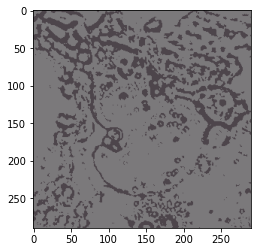

In [21]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(290, 290))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)
import os
from keras.applications.imagenet_utils import decode_predictions
images = transform_img_fn([os.path.join('/90days/s4634945/files/UntitledFolder/K_2_breast_train299','0001img.png')])
plt.imshow(images[0])
preds = model_bayes.predict(images)

In [22]:
%%time
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), model_bayes.predict, top_labels=2, hide_color=0, num_samples=2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/2 [00:00<?, ?it/s]

CPU times: user 1.74 s, sys: 11.3 ms, total: 1.75 s
Wall time: 1.5 s


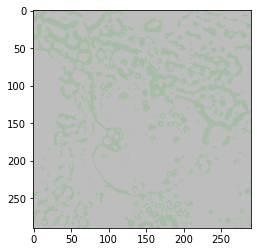

In [26]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=100, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [24]:
explanation.top_labels[0]

1

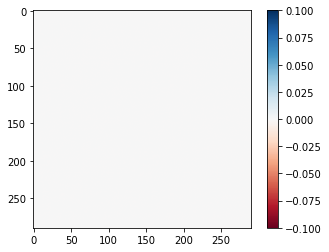

In [25]:
ind =  explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# Kmeans Image Generation

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2   
import glob
%matplotlib inline 


test_Y = pd.read_csv('test_Y.csv')
test_Y = test_Y[['Barcode']]
Cluster = pd.read_csv('Cluter_Img2.csv')
Cluster = Cluster[['Cluster', 'Barcode', 'Sno']]
train_Y = pd.merge(test_Y, Cluster, on='Barcode', how='inner')
#train_Y['Cluster'] = test_Y['Cluster'].replace({2:0})


import pandas as pd

train_Y = train_Y.sort_values(by='Sno')
train_Y = train_Y.reset_index(drop=True)
filename = ((train_Y['Sno']).astype('str') + str(".png")).to_list()

images = sorted(glob.glob("Trainimg_breast_test_299/*.tif"))
for i in range(0,len(images)):
    img1 = cv2.imread(images[i]) 
    image = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
    pixel_vals = image.reshape((-1,3)) 
    pixel_vals = np.float32(pixel_vals)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
    k = 4
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
    centers = np.uint8(centers) 
    segmented_data = centers[labels.flatten()] 
    segmented_image = segmented_data.reshape((image.shape))
    plt.imsave(filename[i],segmented_image)

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import cv2   
import glob
%matplotlib inline 

img1 = cv2.imread("/90days/s4634945/files/UntitledFolder/block1/V1_Breast_Cancer_Block_A_Section_1_image.tif")
image = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
pixel_vals = image.reshape((-1,3)) 
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
k = 
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
centers = np.uint8(centers) 
segmented_data = centers[labels.flatten()] 
segmented_image = segmented_data.reshape((image.shape))
plt.imsave("/90days/s4634945/files/UntitledFolder/block1/V1_Breast_Cancer_Block_A_Section_1_image.png",segmented_image)